In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
import math

In [2]:
image = cv2.imread('f35.png', cv2.IMREAD_GRAYSCALE)

(163, 290)


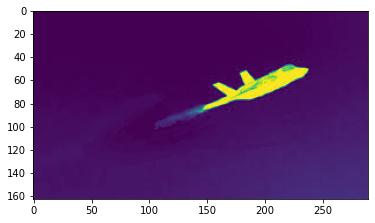

In [3]:
print(image.shape)
plt.imshow(image)

In [4]:
def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(
        ndi.convolve(image, np.real(kernel), mode='wrap') ** 2
        + ndi.convolve(image, np.imag(kernel), mode='wrap') ** 2
    )


In [5]:
ROTATION_OPTIONS = [
    [0, 75, 150],
    [0, 30, 60, 90, 120, 150],
    [16, 36, 54, 72, 90, 108, 126, 144, 162]
]

PAPER_FILTER_BANK_ROTATION = ROTATION_OPTIONS[1]
THETAS = [math.radians(rot) for rot in PAPER_FILTER_BANK_ROTATION]# theta is a radian take on rotations

AMPLITUDE_OPTIONS = [
    [9, 11, 13],
    [5, 7, 9, 11, 13, 15],
    [3, 5, 7, 9, 11, 13, 15, 17, 19]
]

PAPER_FILTER_BANK_AMPLITUDE = AMPLITUDE_OPTIONS[1]
FREQUENCIES = [1/amplitude for amplitude in PAPER_FILTER_BANK_AMPLITUDE]# frequency = 1 / amplitude

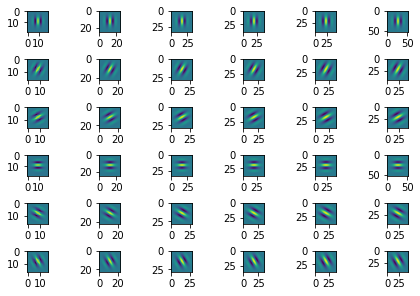

In [6]:
fig, axs = plt.subplots(len(THETAS), len(FREQUENCIES), layout="constrained")
for ti in range(len(THETAS)):
    for fi in range(len(FREQUENCIES)):
        theta = THETAS[ti]
        frequency = FREQUENCIES[fi]
        kernel = gabor_kernel(frequency, theta=theta)
        axs[ti, fi].imshow(np.real(kernel))
plt.show()

theta =  0.0  | frequency =  0.2


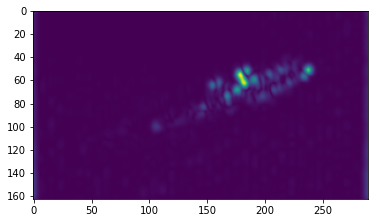

theta =  0.0  | frequency =  0.14285714285714285


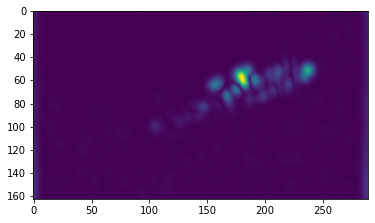

theta =  0.0  | frequency =  0.1111111111111111


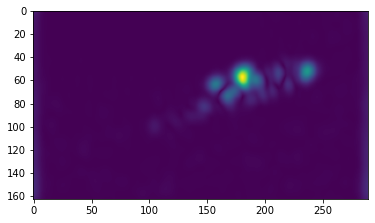

theta =  0.0  | frequency =  0.09090909090909091


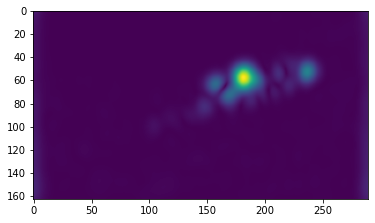

theta =  0.0  | frequency =  0.07692307692307693


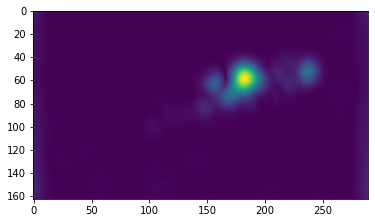

theta =  0.0  | frequency =  0.06666666666666667


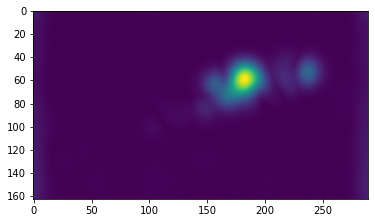

theta =  0.5235987755982988  | frequency =  0.2


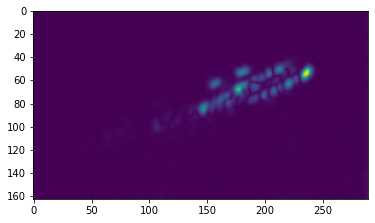

theta =  0.5235987755982988  | frequency =  0.14285714285714285


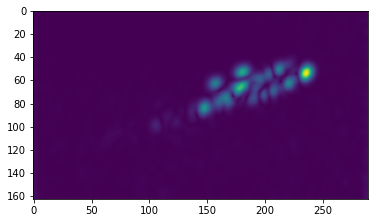

theta =  0.5235987755982988  | frequency =  0.1111111111111111


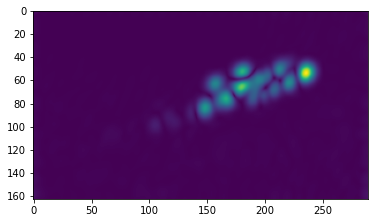

theta =  0.5235987755982988  | frequency =  0.09090909090909091


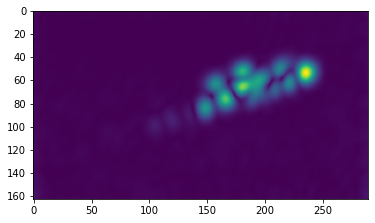

theta =  0.5235987755982988  | frequency =  0.07692307692307693


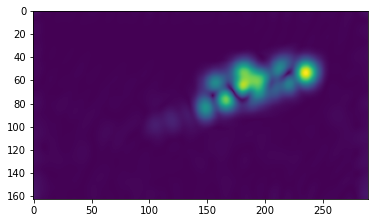

theta =  0.5235987755982988  | frequency =  0.06666666666666667


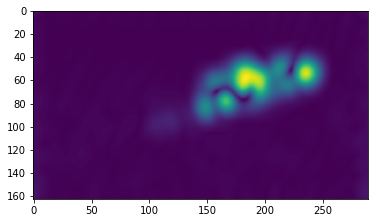

theta =  1.0471975511965976  | frequency =  0.2


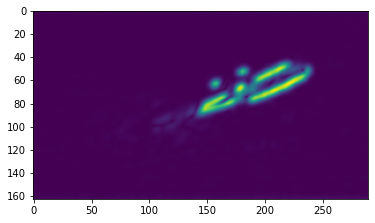

theta =  1.0471975511965976  | frequency =  0.14285714285714285


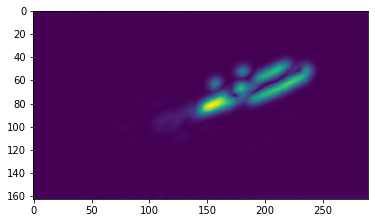

theta =  1.0471975511965976  | frequency =  0.1111111111111111


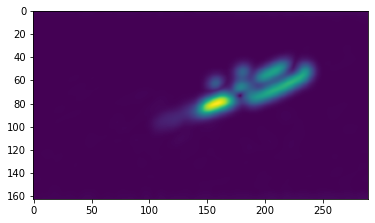

theta =  1.0471975511965976  | frequency =  0.09090909090909091


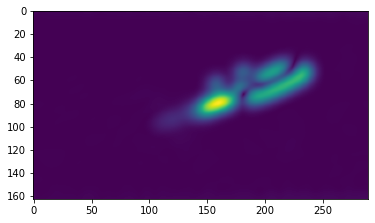

theta =  1.0471975511965976  | frequency =  0.07692307692307693


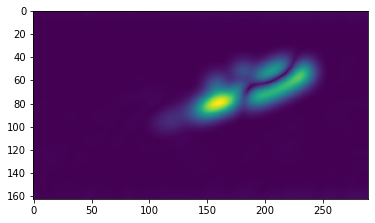

theta =  1.0471975511965976  | frequency =  0.06666666666666667


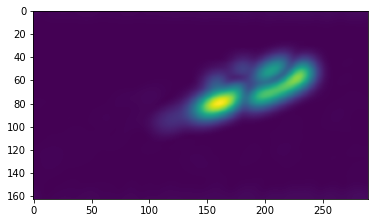

theta =  1.5707963267948966  | frequency =  0.2


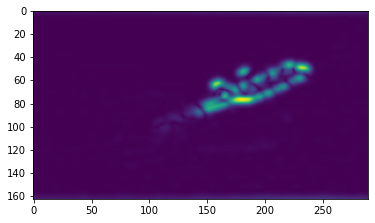

theta =  1.5707963267948966  | frequency =  0.14285714285714285


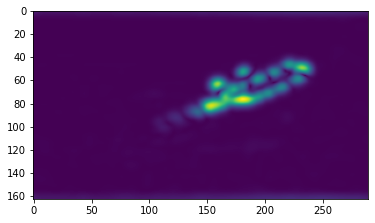

theta =  1.5707963267948966  | frequency =  0.1111111111111111


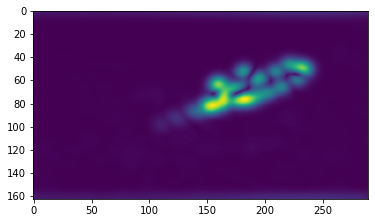

theta =  1.5707963267948966  | frequency =  0.09090909090909091


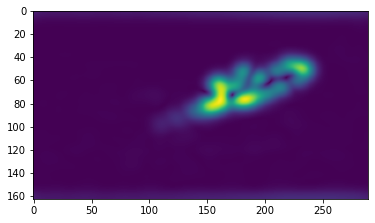

theta =  1.5707963267948966  | frequency =  0.07692307692307693


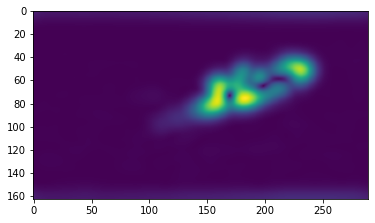

theta =  1.5707963267948966  | frequency =  0.06666666666666667


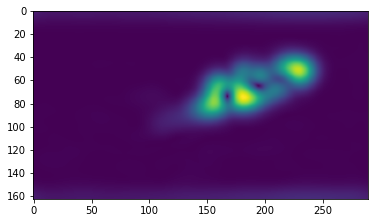

theta =  2.0943951023931953  | frequency =  0.2


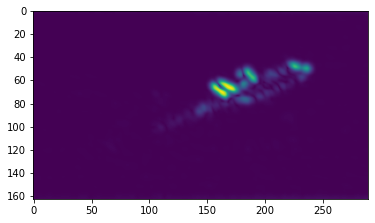

theta =  2.0943951023931953  | frequency =  0.14285714285714285


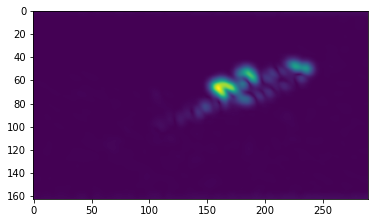

theta =  2.0943951023931953  | frequency =  0.1111111111111111


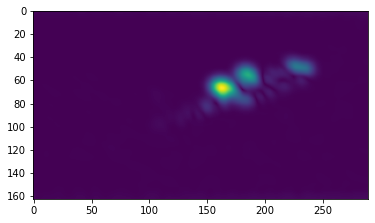

theta =  2.0943951023931953  | frequency =  0.09090909090909091


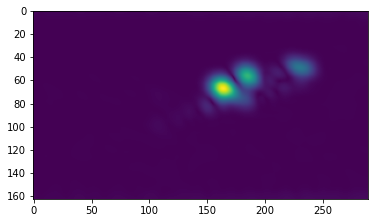

theta =  2.0943951023931953  | frequency =  0.07692307692307693


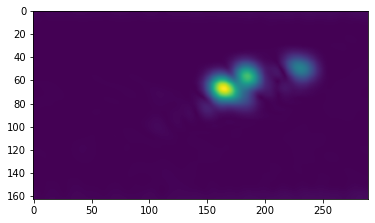

theta =  2.0943951023931953  | frequency =  0.06666666666666667


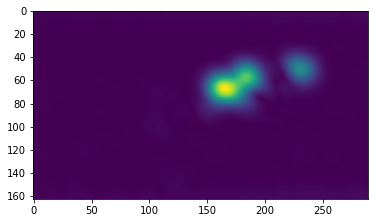

theta =  2.6179938779914944  | frequency =  0.2


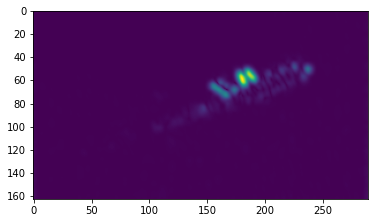

theta =  2.6179938779914944  | frequency =  0.14285714285714285


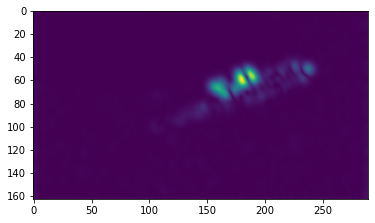

theta =  2.6179938779914944  | frequency =  0.1111111111111111


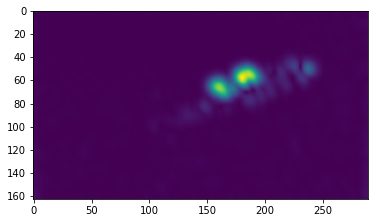

theta =  2.6179938779914944  | frequency =  0.09090909090909091


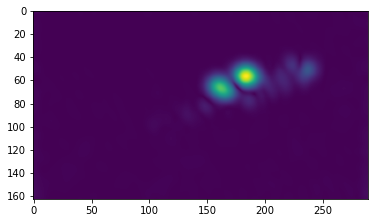

theta =  2.6179938779914944  | frequency =  0.07692307692307693


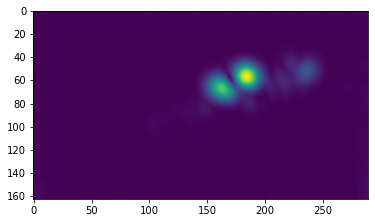

theta =  2.6179938779914944  | frequency =  0.06666666666666667


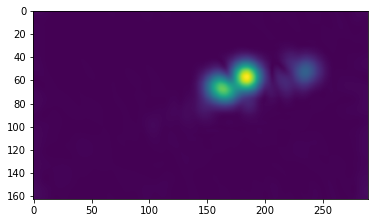

In [7]:
output = np.zeros(image.shape, dtype=np.float64)
for theta in THETAS:
    for frequency in FREQUENCIES:
        print('theta = ',theta, ' | frequency = ', frequency)
        kernel = gabor_kernel(frequency, theta=theta)
        kimage = power(image, kernel)
        output += kimage
        plt.imshow(kimage)
        plt.show()


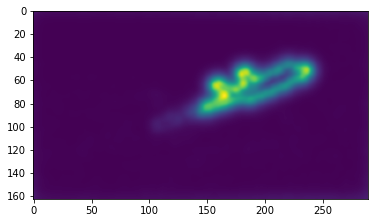

In [8]:
plt.imshow(output)